# ANÁLISIS DE DATOS

# 1. Generar Datos Ficticios

Primero, generaremos un conjunto de datos ficticios.

In [5]:
import pandas as pd
import numpy as np

# Generar datos ficticios
np.random.seed(0)
fechas = pd.date_range(start='2022-01-01', periods=200, freq='D')
categorias = ['Comida para Perros', 'Comida para Gatos', 'Comida para Aves', 'Comida para Peces']
data = {
    'Fecha': np.random.choice(fechas, 1000),
    'Categoria': np.random.choice(categorias, 1000),
    'Ventas': np.random.randint(100, 1000, 1000),
    'Ingresos': np.random.uniform(1000, 10000, 1000),
    'Promociones': np.random.randint(0, 20, 1000),
    'Descuento': np.random.uniform(0, 0.3, 1000)
}

df = pd.DataFrame(data)


In [6]:
# Guardar la data
# Especifica la ruta donde deseas guardar el archivo CSV
ruta_archivo = 'Data_Animales.csv'

# Guarda el DataFrame como un archivo CSV
df.to_csv(ruta_archivo, index=False)

## 2. Análisis Descriptivo

Realizaremos un análisis descriptivo de los datos.

In [7]:
# Estadísticas descriptivas
desc_stats = df.describe()
print(desc_stats)


                            Fecha       Ventas     Ingresos  Promociones  \
count                        1000  1000.000000  1000.000000  1000.000000   
mean   2022-04-12 09:47:31.200000   536.747000  5549.576778     9.145000   
min           2022-01-01 00:00:00   100.000000  1001.680425     0.000000   
25%           2022-02-23 00:00:00   300.000000  3310.944888     4.000000   
50%           2022-04-13 00:00:00   531.500000  5512.213147     9.000000   
75%           2022-05-30 00:00:00   762.000000  7825.842187    14.000000   
max           2022-07-19 00:00:00   999.000000  9992.872002    19.000000   
std                           NaN   266.333705  2586.200645     5.792714   

         Descuento  
count  1000.000000  
mean      0.143675  
min       0.000022  
25%       0.068575  
50%       0.142516  
75%       0.215175  
max       0.298720  
std       0.084841  


In [19]:
# Realizar el anàlisis descriptivo de cada variable utilice librerias
# Análisis de la Variable 'Fecha'
descripcion_fecha = df['Fecha'].describe()

print("Análisis de la variable 'Fecha':")
print(descripcion_fecha)

Análisis de la variable 'Fecha':
count                          1000
mean     2022-04-12 09:47:31.200000
min             2022-01-01 00:00:00
25%             2022-02-23 00:00:00
50%             2022-04-13 00:00:00
75%             2022-05-30 00:00:00
max             2022-07-19 00:00:00
Name: Fecha, dtype: object


In [20]:
# Realizar el anàlisis descriptivo de cada variable utilice librerias
# Análisis de la Variable 'Ventas'
descripcion_ventas = df['Ventas'].describe()

print("Análisis de la variable 'Ventas':")
print(descripcion_ventas)

Análisis de la variable 'Ventas':
count    1000.000000
mean      536.747000
std       266.333705
min       100.000000
25%       300.000000
50%       531.500000
75%       762.000000
max       999.000000
Name: Ventas, dtype: float64


In [21]:
# Realizar el anàlisis descriptivo de cada variable utilice librerias
# Análisis de la Variable 'Ingresos'
descripcion_ingresos = df['Ingresos'].describe()

print("Análisis de la variable 'Ingresos':")
print(descripcion_ingresos)

Análisis de la variable 'Ingresos':
count    1000.000000
mean     5549.576778
std      2586.200645
min      1001.680425
25%      3310.944888
50%      5512.213147
75%      7825.842187
max      9992.872002
Name: Ingresos, dtype: float64


In [22]:
# Realizar el anàlisis descriptivo de cada variable utilice librerias
# Análisis de la Variable 'Promociones'
descripcion_promociones = df['Promociones'].describe()

print("Análisis de la variable 'Promociones':")
print(descripcion_promociones)

Análisis de la variable 'Promociones':
count    1000.000000
mean        9.145000
std         5.792714
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        19.000000
Name: Promociones, dtype: float64


In [23]:
# Realizar el anàlisis descriptivo de cada variable utilice librerias
# Análisis de la Variable 'Descuento'
descripcion_descuento = df['Descuento'].describe()

print("Análisis de la variable 'Descuento':")
print(descripcion_descuento)

Análisis de la variable 'Descuento':
count    1000.000000
mean        0.143675
std         0.084841
min         0.000022
25%         0.068575
50%         0.142516
75%         0.215175
max         0.298720
Name: Descuento, dtype: float64


In [43]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 30.3 MB/s eta 0:00:00


In [44]:
import sweetviz as sv

In [45]:
advert_report = sv.analyze([df, "Generación de un reporte de las ventas de comida para 4 tipos de animales:"])

                                             |          | [  0%]   00:00 -> (? left)

In [46]:
advert_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 3. Análisis Predictivo

Utilizaremos un modelo de regresión lineal para predecir las ventas.

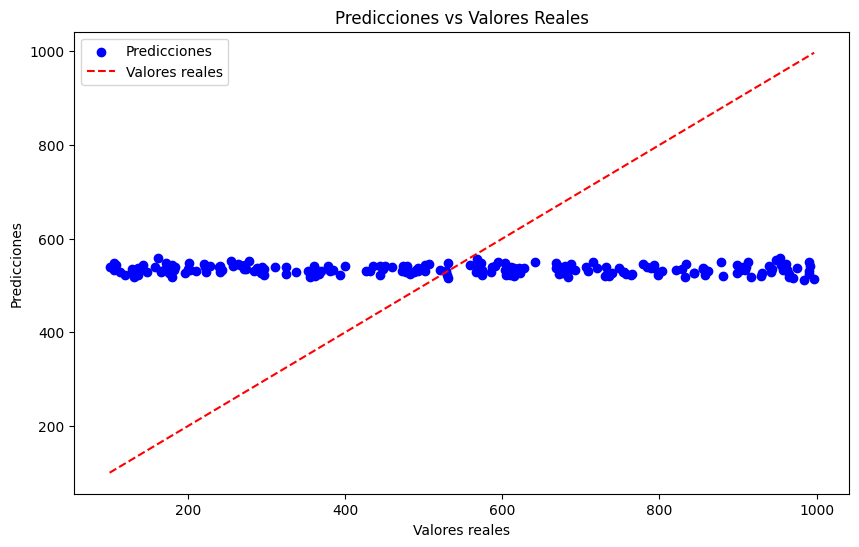

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Preparar los datos
X = df[['Ingresos', 'Promociones', 'Descuento']]
y = df['Ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
predicciones = model.predict(X_test)

#Representar de manera Gràfica
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Valores reales')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()


In [27]:
# Guardar el gráfico como imagen PNG
plt.savefig('prediccion.png')

<Figure size 640x480 with 0 Axes>

## 4. Análisis de Series Temporales

Realizaremos un análisis de series temporales con un gráfico.

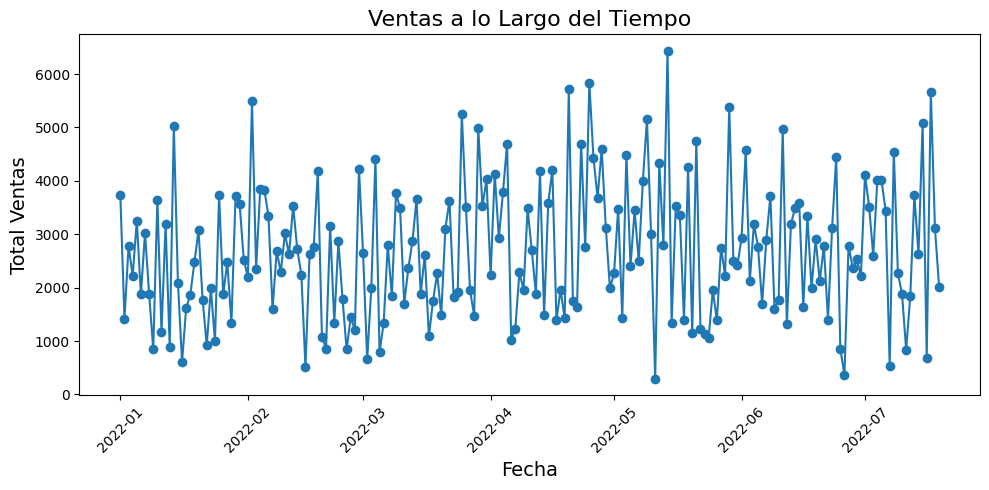

In [10]:
import matplotlib.pyplot as plt

# Ventas por fecha
ventas_fecha = df.groupby('Fecha').agg({'Ventas': 'sum'}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(ventas_fecha['Fecha'], ventas_fecha['Ventas'], marker='o')
plt.title("Ventas a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Total Ventas", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [28]:
# Guardar el gráfico como imagen PNG
plt.savefig('ventaslp.png')

<Figure size 640x480 with 0 Axes>

## 5. Segmentación de Datos
Realizaremos la segmentación de los datos.

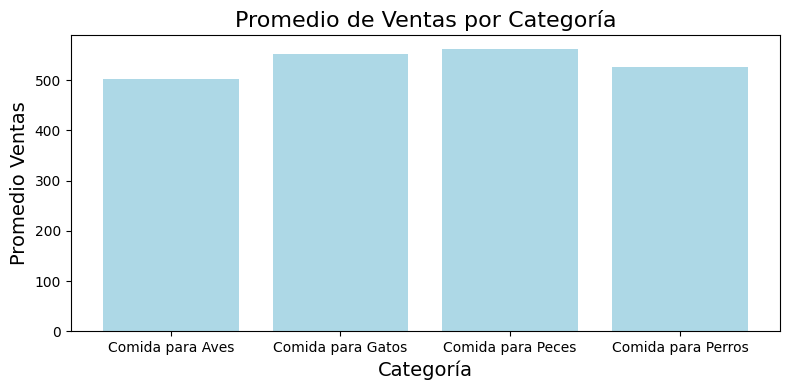

In [11]:
segmentos = df.groupby('Categoria').agg({'Ventas': 'mean'}).reset_index()

plt.figure(figsize=(8, 4))
plt.bar(segmentos['Categoria'], segmentos['Ventas'], color='lightblue')
plt.title("Promedio de Ventas por Categoría", fontsize=16)
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Promedio Ventas", fontsize=14)
plt.tight_layout()
plt.show()


In [29]:
# Guardar el gráfico como imagen PNG
plt.savefig('promcategoria.png')

<Figure size 640x480 with 0 Axes>

## 6. Optimización y Modelo de Decisiones

Realizaremos una optimización simple usando scipy.

In [12]:
from scipy.optimize import linprog

# Definir coeficientes de la función objetivo (negativa para maximizar)
c = [-20, -15]  # Ejemplo de coeficientes
A = [[1, 1], [20, 15]]
b = [40, 500]

# Realizar la optimización
res = linprog(c, A_ub=A, b_ub=b)
print("Resultados de la optimización:", res)


Resultados de la optimización:         message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -500.00000000000006
              x: [ 0.000e+00  3.333e+01]
            nit: 1
          lower:  residual: [ 0.000e+00  3.333e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 6.667e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


## 7. Crear la Presentación Ejecutiva

Finalmente, crearemos la presentación en PowerPoint.

In [25]:
!pip install python-pptx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 8.8 MB/s eta 0:00:00


In [33]:
from pptx import Presentation
from pptx.util import Inches

# Crear presentación
prs = Presentation()

# Función para agregar un título y un subtítulo
def add_title_slide(title, subtitle):
    slide = prs.slides.add_slide(prs.slide_layouts[0])
    slide.shapes.title.text = title
    slide.placeholders[1].text = subtitle

# Diapositiva de título
add_title_slide("Análisis de Ventas de Comida para Mascotas", "Análisis completo de datos y resultados")

# Estadísticas Descriptivas
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Estadísticas Descriptivas"
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
content.text = desc_stats.to_string()

# Gráfico de ventas por categoría
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Predicciones vs Valores reales"
slide.shapes.add_picture("/content/prediccion.png", Inches(0.5), Inches(1), width=Inches(8))

# Análisis de Series Temporales
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Ventas a lo Largo del Tiempo"
slide.shapes.add_picture("/content/ventaslp.png", Inches(0.5), Inches(1), width=Inches(8))

# Análisis de Series Temporales
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Promedio de ventas por categoria"
slide.shapes.add_picture("/content/promcategoria.png", Inches(0.5), Inches(1), width=Inches(8))

# Resultados de Optimización
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Resultados de Optimización"
optimization_result = f"Comida para Perros: {res.x[0]:.2f}\nComida para Gatos: {res.x[1]:.2f}\nGanancia Total: {-res.fun:.2f}"
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
content.text = optimization_result

# Conclusiones
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Conclusiones Finales"
conclusiones = (
    "1. Identificamos las categorías más vendidas y sus tendencias.\n"
    "2. El modelo predictivo proporciona información valiosa sobre ventas.\n"
    "3. Las promociones tienen un impacto significativo en las ventas.\n"
    "4. La optimización sugiere cantidades óptimas para maximizar ganancias."
)
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
content.text = conclusiones


In [34]:
# Guardar la presentación
prs.save("Analisis_Ventas_Pets_Completo.pptx")

In [37]:
#Crear la presentaciòn de los datos con Power Bi
#Instalar la librería
!pip install powerbiclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.9/684.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b1f89c92c97a2dcdae06eb873db8656b736155392b910b20f7fe8f135e4d2f1d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [38]:
#Importar la librería
from powerbiclient import QuickVisualize, get_dataset_config

In [39]:
#Autenticación en Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [ ]:
device_auth=DeviceCodeLoginAuthentication()

In [ ]:
PBI_visualizacion=QuickVisualize(get_dataset_config(df), auth=device_auth)

In [ ]:
PBI_visualizacion